# COGS 108 - Final Project 

# Overview

In this project, I identified the relationship between yelp comment numbers and yelp average ratings of San Diego parks. Using the Spearman Correlation, there is a weak, negative, and nonlinear correlation between the two variables. I also analyzed the key factors contributing to visitor satisfaction of SD parks. I conducted TF-IDF analysis and found that the opening state, safety, and playground spaces are important to visitor experience.

# Name & GitHub

- Name: Junhui Fan
- GitHub Username: Junhui-1

# Research Question

What is the relationship between yelp comment numbers and yelp ratings of San Diego parks? What factors of San Diego parks (e.g., facilities, staff) are important to visitor experience? 

## Background and Prior Work

Parks, as public spaces, are used to serve people for playing, relaxing, communicating, and exercising. Providing satisfying experiences to visitors is regarded as an essential purpose for park managers. Therefore, factors that affect visitor experience should be measured so park managers can be directed to improve visitor satisfaction. McGuire and Dottavio (1989), using the post hoc method, studied three state parks in Montana and found that the upkeep of park facilities and ground and park staff are mostly attributed to visitor satisfaction. Fletcher and Fletcher (2003) conducted surveys of 25 parks in Florida and indicated that "visitor satisfaction is strongly related to maintenance of the park and to behaviors of park personnel. The two research encourage me to hypothesize that the factors of SD parks influencing visitor experience should be similar to the factors concluded by them. 

Besides, the relationship between yelp review numbers and yelp average ratings are also worth considering. Review numbers and scores are often regarded as correlated. The number of online comments often indicates the quality of online merchandise (Arnould & Thompson). The number of comments on YouTube videos also demonstrates the quality of the videos (Siersdorfer, Nejdl & San Pedro). If parks have provided high-quality visitor experiences, visitors are expected to leave comments on social media to express their praise. Conversely, parks with lots of comments on social media should be an indicator to park reputation and quality. Therefore, I want to use yelp data to calculate the correlation between comment numbers and ratings of SD parks to test my hypothesis.


References (include links):
- 1) McGuire, F.A., O’Leary, J.T., & Dottavio, F.D. (1989). Journal of Park and Recreation Administration, 7(3), 24-33.

- 2)Fletcher, Donna & Fletcher, Harold. (2003). Manageable Predictors of Park Visitor Satisfaction: Maintenance and Personnel. Journal of Park and Recreation Administration, 21(1), 21-37.
http://staff.washington.edu/kwolf/Archive/Classes/ESRM304_SocSci/304%20Soc%20Sci%20Lab%20Articles/Fletcher_2003.pdf

- 3)Arnould, E. and Thompson, C. (2005). Consumer culture theory (CCT): Twenty years of research. J. Consum. Resear. 31, 868--882.

- 4)Siersdorfer, Stefan., Nejdl, Wolfgang & San Pedro, Jose. (2010). How useful are your comments? Analyzing and predicting YouTube comments and comment ratings. 

# Hypothesis


I hypothesize that there is a positive correlation between yelp comment numbers and yelp ratings of SD parks. This is because the quality of parks is generally measured by the popularity of parks, and the popularity of parks is generally measured by the comment numbers.

In addition, I hypothesize that the facilities, staff and maintenance of San Diego parks are key factors to visitor experience. Researches above investigated considerable amount of state parks and concluded park facilities, staff and maintenance are strongly related to visitor satisfication. Thus, I suppose my analysis of yelp review data of SD parks should generate similar results compared to the researches. 

# Dataset(s)

The ideal dataset should include the following variables: names of SD parks, personal ratings of SD parks (based on self-administrated surveys questioning), and personal comments of SD parks (as answers to the open-ended question). The number of observations is expected to be 5000 or more. The observation subjects should be people who visited SD parks. The data would be designed and gathered by park staff. The data would be distributed through online surveys via email to people who visited SD parks. The data should be organized into csv/xml.

The following datasets are provided by the instructor. They are from yelp endpoint.


- Dataset Name: yelp_SD_parks
- Link to the dataset: https://www.yelp.com/developers/documentation/v3/business_search
- Number of observations: There are 833 parks in total.
- Description: This data provides general information of San Diego parks, such as name and address, the average yelp rating for SD parks, and amount of review of SD parks.



- Dataset Name: yelp_SD_reviews
- Link to the dataset: https://www.yelp.com/developers/documentation/v3/business_reviews
- Number of observations: There are 2333 reviews in total.
- Description: This data provides SD park names, yelp user rating, and yelp user comment on SD parks.

# Setup

In [1]:
# Imports
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

# Import nltk package 
# PennTreeBank word tokenizer 
# English language stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

# scikit-learn imports
# TF-IDF Vectorizer that first removes widely used words in the dataset and then transforms test data

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Setting the common figure size
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams.update({'font.size': 14})

In [2]:
# Read Data
df_park = pd.read_csv('yelp_SD_parks.csv')
df_park_comment = pd.read_csv('yelp_SD_reviews.csv')

In [3]:
df_park.head()

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False


In [4]:
df_park_comment.head()

,id,rating,text
0,Balboa Park,5,Balboa Park is a must see when coming to San D...
1,Balboa Park,5,Beautiful grounds even to take a stroll during...
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is..."


# Data Cleaning

I will rename variables, remove columns not needed for analysis and check if any needed columns has NaN value.

In [5]:
# Drop variables in df_park which I will not use
df_park = df_park.drop(columns = ['phone', 'url', 'longitude', 'latitude', 'is_closed', 'id', 'address'])

# Drop and rename variables in df_park for easier analysis
df_park.rename(columns = {'rating': 'avg_rating', 
                                  'review_count' : 'comment_count'},inplace=True)

# Check any missing value in df_park
df_park.isnull().sum()

name             0
avg_rating       0
comment_count    0
dtype: int64

There is no missing value in df_park.

In [6]:
df_park.head()

,name,avg_rating,comment_count
0,Balboa Park,5.0,2105
1,Civita Park,4.5,46
2,Waterfront Park,4.5,242
3,Trolley Barn Park,4.5,102
4,Bay View Park,5.0,42


In [7]:
## YOUR CODE HERE
# Rename variables in df_park_comment for easier analysis
df_park_comment.rename(columns={'id': 'park_name', 'rating': 'personal_rating', 'text':'comment'}, inplace=True)

# Check any missing value in df_park_comment
df_park_comment.isnull().sum()

park_name          0
personal_rating    0
comment            0
dtype: int64

There is no missing value in df_park_comment.

In [8]:
df_park_comment.head()

,park_name,personal_rating,comment
0,Balboa Park,5,Balboa Park is a must see when coming to San D...
1,Balboa Park,5,Beautiful grounds even to take a stroll during...
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is..."


# Data Analysis & Results

I will first observe the description of df_park, knowing if the distributions of yelp average rating and yelp comment numbers are normal. If the two distributions are normal, I can apply Pearson Correlation test.

In [9]:
# Observe the shape of df_park
df_park.describe()

,avg_rating,comment_count
count,833.000000,833.000000
mean,4.039616,201.246098
std,0.796396,744.775857
min,1.000000,1.000000
25%,3.500000,6.000000
50%,4.000000,22.000000
75%,4.500000,109.000000
max,5.000000,14195.000000


Text(0, 0.5, 'Frequency')

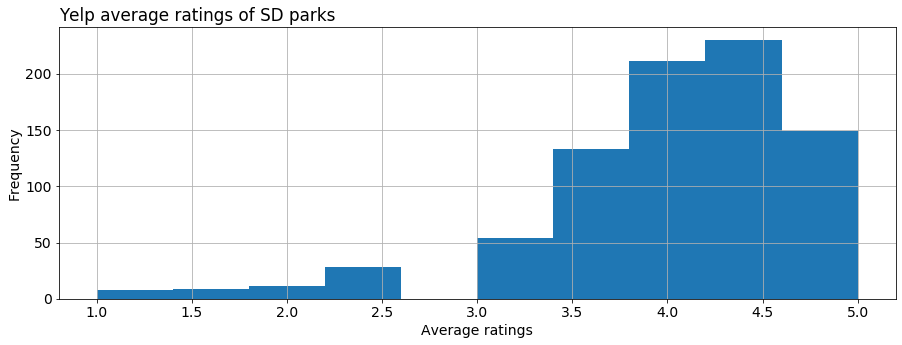

In [10]:
# Plot histograms of df_park to the distribution of each variable.
df_park['avg_rating'].hist()
plt.title('Yelp average ratings of SD parks', loc='left')
plt.xlabel('Average ratings')
plt.ylabel('Frequency')

Above is the histogram of yelp average ratings of SD parks. The histogram is very skewed.

Text(0, 0.5, 'Frequency')

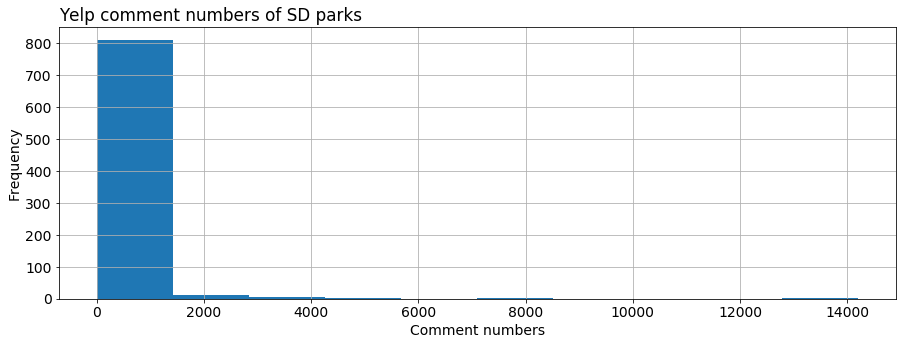

In [11]:
# Plot histograms of df_park to the distribution of each variable.
df_park['comment_count'].hist()
plt.title('Yelp comment numbers of SD parks', loc='left')
plt.xlabel('Comment numbers')
plt.ylabel('Frequency')

Above is the histogram of yelp average ratings of SD parks. The histogram is very skewed.

The distribution of each variable is very skewed. Transforming data into log does not help. Thus, the Pearson Correlation (requiring normal distributions of the two variables) cannot be used. Instead, the Spearman Correlation test is suited for the skewed variables.

Text(0, 0.5, 'Average ratings')

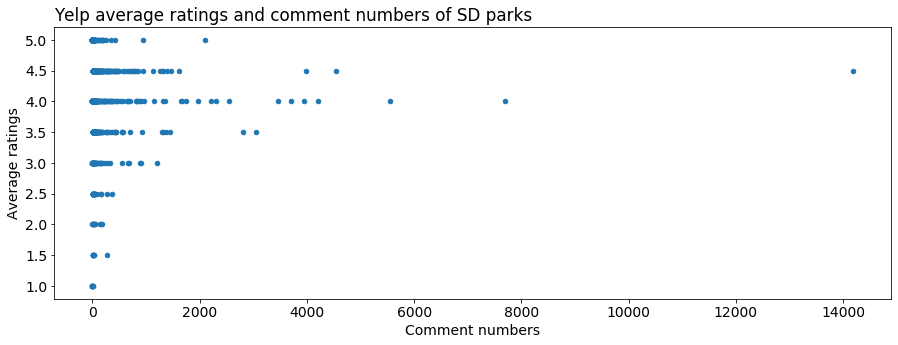

In [12]:
# Draw a scatterplot to observe the correlation between average rating and comment numbers in df_park
df_park.plot.scatter(x = 'comment_count', y = 'avg_rating')
plt.title('Yelp average ratings and comment numbers of SD parks', loc='left')
plt.xlabel('Comment numbers')
plt.ylabel('Average ratings')

Above is the scatterplot of the two variables. The relationship between the two variables is hard to visualize. The Spearman Correlation will be conducted.

In [13]:
# Calculate Spearman Correlation
stats.spearmanr(df_park['comment_count'], df_park['avg_rating'])

SpearmanrResult(correlation=-0.12004392436484494, pvalue=0.0005165261065135084)

The Spearman Correlation is negative, and its P-value < 0.05 is effective to reject the null hypothesis. This shows that the comment numbers and ratings for SD parks have a weak, negative, and nonlinear correlation, according to yelp data. 

I will then use TF-IDF to analyze key words of the park comments.

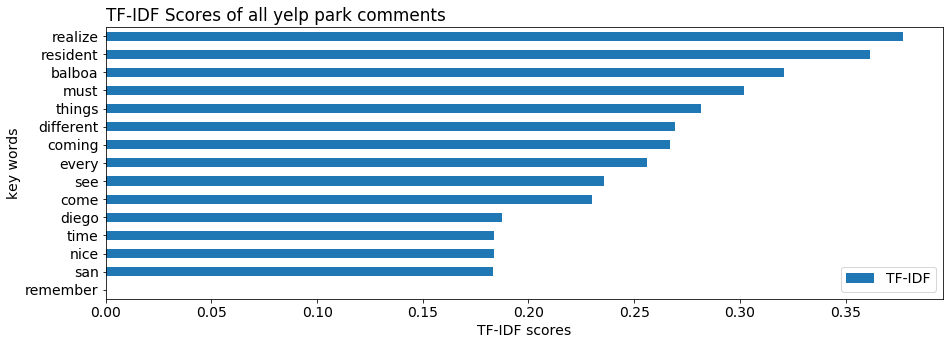

In [14]:
# Calculate TF-IDF of all comments
stop_words = nltk.corpus.stopwords.words('english')
comment_list = list(df_park_comment['comment'])

# Initialize a TFIDF object
tfIdfVectorizer=TfidfVectorizer(analyzer='word',
                                stop_words = stop_words,
                                max_df = 0.11,
                                min_df = 0,
                                strip_accents = 'unicode',
                        sublinear_tf=True,
                        max_features=4000,
                        tokenizer=nltk.word_tokenize)
tfIdf_all = tfIdfVectorizer.fit_transform(comment_list)

# Create a dataframe
df_all = pd.DataFrame(tfIdf_all[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])

# Reset column names
df_all['word']=df_all.index
df_all = df_all.reset_index(drop=True)
df_all = df_all[['word', 'TF-IDF']]
df_all = df_all.sort_values('TF-IDF', ascending=False)

# Plot TF-IDF graph
ax = df_all[0:15].plot(x = 'word', y = 'TF-IDF', kind='barh' )
plt.title('TF-IDF Scores of all yelp park comments', loc='left')
plt.xlabel('TF-IDF scores')
plt.ylabel('key words')
plt.gca().invert_yaxis()

Above is the TF-IDF Scores of all yelp park comments. The greater the TF-IDF scores, the more important the word in all comments.

The TF-IDF Scores of all yelp park comments tell little information about factors contributing to visitor satisfaction. The key words appeared here are mainly verbs and emotional words.

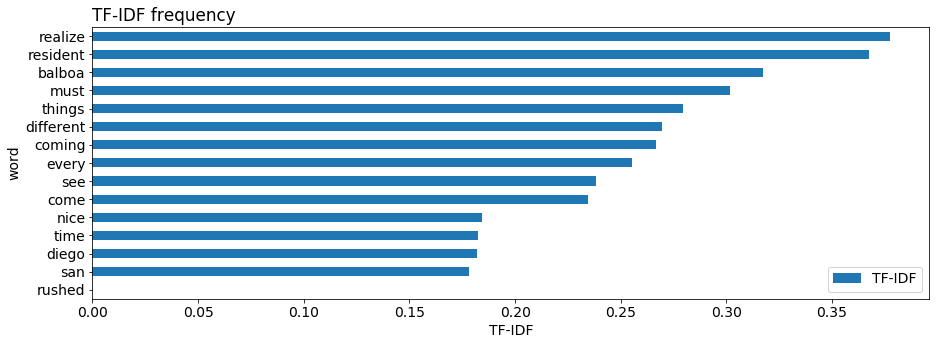

In [15]:
# Calculate TF-IDF of positive comments
df_comment_pos = df_park_comment[df_park_comment['personal_rating'] >= 4]
comment_list_pos = list(df_comment_pos['comment'])

# Create a dataframe
tfIdf_pos = tfIdfVectorizer.fit_transform(comment_list_pos)
df_pos = pd.DataFrame(tfIdf_pos[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df_pos = df_pos.sort_values('TF-IDF', ascending=False)

# Reset column names
df_pos['word']=df_pos.index
df_pos = df_pos.reset_index(drop=True)
df_pos = df_pos[['word', 'TF-IDF']]

# Plot TF-IDF graph
ax = df_pos[0:15].plot(x = 'word', y = 'TF-IDF', kind='barh' )
plt.title('TF-IDF frequency', loc='left')
plt.xlabel('TF-IDF')
plt.ylabel('word')
plt.gca().invert_yaxis()

Above is the TF-IDF Scores of all positive yelp park comments. The greater the TF-IDF scores, the more important the word in all positive comments.

The TF-IDF Scores of positive yelp park comments also tell little information about factors contributing to visitor satisfaction. The key words appeared here are mainly verbs and emotional words.

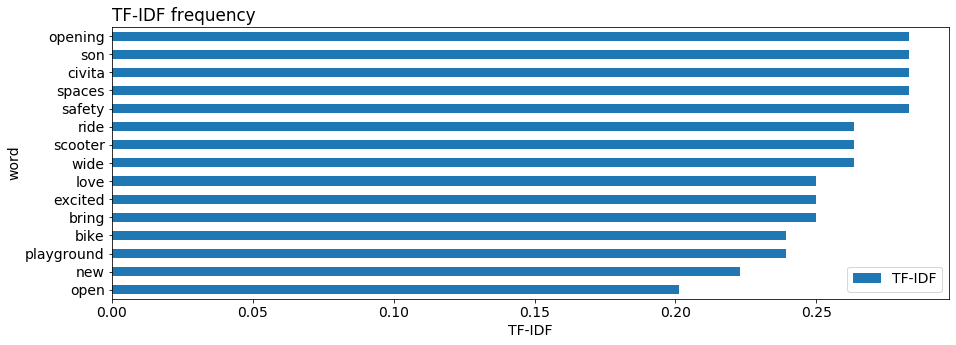

In [16]:
# Calculate TF-IDF of negative comments
df_comment_neg = df_park_comment[df_park_comment['personal_rating'] <= 2]
comment_list_neg = list(df_comment_neg['comment'])

# Create a dataframe
tfIdf_neg = tfIdfVectorizer.fit_transform(comment_list_neg)
df_neg = pd.DataFrame(tfIdf_neg[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])

# Reset column names
df_neg['word']=df_neg.index
df_neg = df_neg.reset_index(drop=True)
df_neg = df_neg[['word', 'TF-IDF']]
df_neg = df_neg.sort_values('TF-IDF', ascending=False)

# Plot TF-IDF graph
ax = df_neg[0:15].plot(x = 'word', y = 'TF-IDF', kind='barh' )
plt.title('TF-IDF frequency', loc='left')
plt.xlabel('TF-IDF')
plt.ylabel('word')
plt.gca().invert_yaxis()

Above is the TF-IDF Scores of all negative yelp park comments. The greater the TF-IDF scores, the more important the word in all nagative comments.

The TF-IDF Scores of negative yelp park comments convey useful information. Words "safety", "open" and "playground" are key factors toward visitor unsatisfaction.

# Ethics & Privacy

The two yelp data are available to the public, so removing personal information is needed. For the yelp comment data, any personal information has been removed before I obtain the data; the variables left are only park ids, yelp user ratings, and yelp user comments. For the yelp park data, park addresses, contact phones, and websites are regarded as public information. As this project does not need them, they are dropped for convenience. Therefore, the worry about privacy for the datasets is scarcely any. 

Regarding the samples of the two datasets, there is sampling bias in yelp comments and ratings. Yelp reviews and ratings are not representative samples for the entire population (people who visited SD parks). Some people may have satisfactions or dissatisfactions about the SD parks but do not leave comments and ratings on yelp. The bias for voluntarily online comments is unavoidable, and analyzing the data may not accurately demonstrate true results. If applicable, the datasets should be gathered by online surveys clearly asking about factors that influence visitor experience. The yelp park comments are not highly reliable to analyze factors that affect visitor satisfaction.

In addition, interpreting the results of my analysis should be taken into consideration. The data represents SD park ratings and reviews on yelp, instead of the park ratings and reviews all over the country or on all social media platforms.  As a result, my analysis is only applicable to SD parks and reviews on yelp. Any extended application is misleading and inconclusive, which is unethical. 

# Conclusion & Discussion

In this project, I hypothesized that there is a positive correlation between yelp comment numbers and yelp ratings of SD parks, and I hypothesized the facilities, staff, and maintenance of San Diego parks are key factors to the visitor experience.

By using the Spearman Correlation test, I concluded that there is a weak, negative, and nonlinear correlation between the yelp comment numbers and yelp ratings for SD parks. Secondly, by using TF-IDF, I found that the key factors influencing visitor experience are safety, playground space, and the opening state of SD parks. None of the results supports my hypotheses, which may be due to several limitations from the data and my analysis method. Firstly, yelp data is not completely collected. The Yelp API has limitations on reviews obtained, so I did not get complete comments. Secondly, the yelp park comments are not very suitable to analyze factors influencing visitor experience. A dataset of online surveys should be better because surveys clearly ask subjects to evaluate factors affecting visitor experience. Thirdly, the TF-IDF analysis, if ideally, would filter words that are irrelevant to analyzing the factors. Limited by personal ability, I did not exclude the irrelevant words. The TF-IDF could have demonstrated more factors that influence visitor experience. 